# Logistic Regression : Multiclass Classification

#### **Multi-Class Logistic Regression is an extension of Logistic Regression used for classification problems with more than two classes (e.g.,**

#### **classifying digits, types of flowers, etc.).**

- Standard Logistic Regression works for binary classification (e.g., Yes/No, Spam/Not Spam).
- Multi-Class Logistic Regression handles cases where there are three or more categories.

In [1]:
from sklearn.datasets import load_digits

%matplotlib inline 
import matplotlib.pyplot as plt

### loading trianing set

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
# to find what the data contains at its zeroth position
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### printing the images that the dataset contains

**plt.gray(): Sets the default colormap to grayscale.**

- Ensures images are displayed in black & white instead of color
- Without plt.gray(), some environments may display images in a colored heatmap style.

**Displays an image from the dataset (digits.images[0]).**
- matshow() is used for matrix visualization, but it works well for images (since images are 2D arrays).


<Figure size 640x480 with 0 Axes>

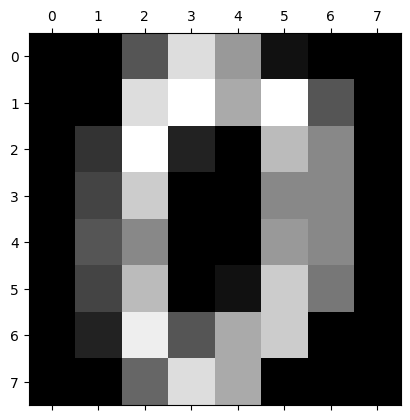

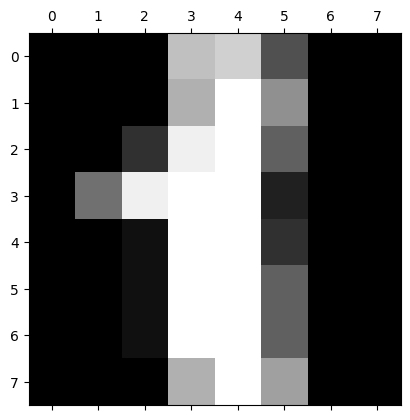

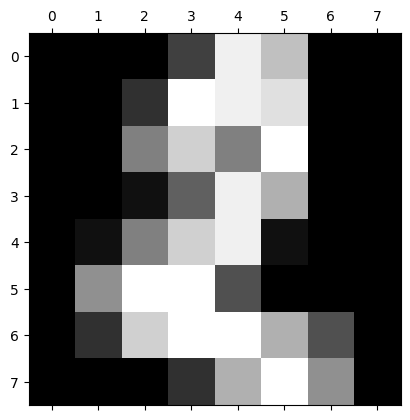

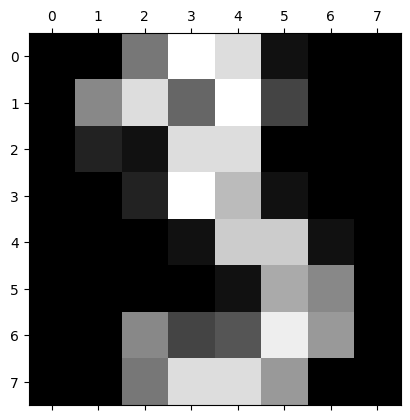

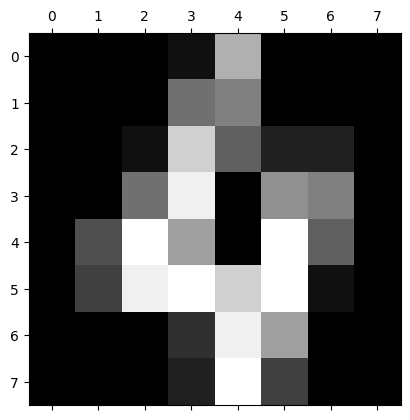

In [11]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [16]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

## so we can use data and target to train our model i.e digits.data and digits.target

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [19]:
len(X_train)

1437

In [20]:
len(X_test)

360

### after splitting the datasets now we have to train our model using logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 500)

In [26]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [27]:
## calculating the score
model.score(X_test, y_test)

0.9638888888888889

### as our training model is ready now we gonna predict

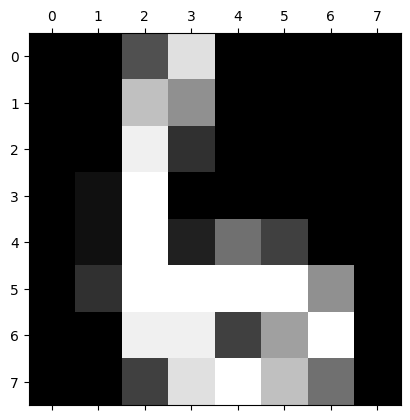

In [28]:
plt.matshow(digits.images[67])

In [29]:
digits.target[67]

np.int64(6)

In [31]:
## now lets see what our model will predict for the above 
model.predict([digits.data[67]])

array([6])

In [34]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [38]:
## predicting the X_test
y_predicted = model.predict(X_test)
y_predicted

array([9, 6, 3, 3, 1, 3, 2, 5, 2, 6, 4, 0, 1, 8, 3, 4, 3, 7, 3, 2, 6, 8,
       0, 2, 0, 9, 8, 4, 5, 5, 5, 5, 9, 0, 5, 8, 0, 7, 0, 2, 2, 2, 6, 6,
       8, 4, 8, 6, 7, 0, 5, 1, 5, 6, 5, 8, 7, 9, 2, 5, 0, 0, 2, 7, 0, 4,
       7, 0, 1, 7, 8, 7, 7, 9, 2, 6, 1, 8, 4, 2, 0, 3, 3, 9, 0, 2, 9, 5,
       6, 3, 8, 1, 0, 0, 8, 0, 7, 1, 3, 0, 4, 1, 3, 4, 6, 4, 1, 5, 8, 2,
       2, 8, 1, 2, 3, 1, 6, 5, 1, 5, 9, 3, 3, 2, 4, 0, 1, 5, 1, 4, 7, 7,
       3, 2, 5, 4, 7, 8, 3, 4, 9, 5, 8, 5, 7, 1, 1, 9, 2, 9, 1, 1, 4, 9,
       7, 3, 4, 0, 8, 2, 7, 0, 6, 0, 0, 7, 0, 3, 1, 6, 5, 8, 4, 7, 4, 6,
       6, 4, 7, 6, 1, 3, 5, 7, 0, 3, 4, 1, 9, 1, 7, 8, 3, 7, 9, 7, 2, 9,
       2, 2, 3, 2, 3, 5, 1, 4, 3, 8, 1, 0, 8, 4, 9, 7, 9, 2, 9, 9, 1, 8,
       3, 7, 5, 9, 9, 6, 6, 0, 3, 5, 6, 1, 8, 6, 3, 3, 3, 8, 4, 3, 0, 5,
       7, 7, 7, 0, 4, 4, 6, 2, 8, 3, 2, 5, 0, 7, 4, 1, 6, 4, 9, 5, 1, 4,
       1, 7, 1, 7, 8, 1, 4, 4, 0, 4, 2, 7, 4, 3, 9, 2, 4, 1, 0, 0, 5, 9,
       6, 8, 1, 9, 9, 5, 5, 7, 1, 1, 1, 1, 5, 0, 0,

## Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predicted, y_test)
cm

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  2,  0,  0,  1,  0,  0,  1,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  0, 31,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 34,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 32,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  1, 32]])

#### seaborn library is similar to matplolib used for better visualisation

here we gonna use seaborn library

Text(95.72222222222221, 0.5, 'Truth')

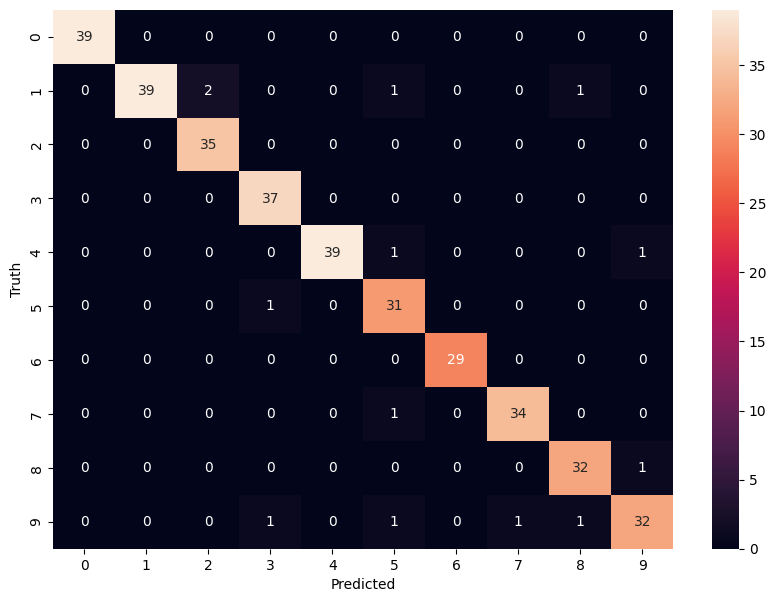

In [45]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot =True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

**what does the above table means**
- **here in the first column 39 means : 39 times the truth was 0 and my model predicted it to be zero**
- **here in the 3rd column 2 means : 2 times i passed 1 to my model and my model said no it is 2** i.e 2 times the truth was 1 and my model said no it is 2

so at this instances my model is not doing good